2.0.0
                                       current_state  action    reward  \
0  [0.2237854  0.45226902 0.7154949  0.08250281 0...       2 -0.129390   
1  [0.23054504 0.4448236  0.71337205 0.23458141 0...       2 -0.147184   
2  [0.23040771 0.43769225 0.7115972  0.41268122 0...       4 -0.164228   
3  [0.23054504 0.42645842 0.71065336 0.60430264 0...       1 -0.191077   
4  [0.23190308 0.41551572 0.709196   0.77778906 0...       3 -0.217230   

                                          next_state  total_reward   done  \
0  [0.2237854  0.45226902 0.7154949  0.08250281 0...     -0.129390  False   
1  [0.23054504 0.4448236  0.71337205 0.23458141 0...     -0.276574  False   
2  [0.23040771 0.43769225 0.7115972  0.41268122 0...     -0.440802  False   
3  [0.23054504 0.42645842 0.71065336 0.60430264 0...     -0.631879  False   
4  [0.23190308 0.41551572 0.709196   0.77778906 0...     -0.849108  False   

   policy_type  episode  
0            0        0  
1            0        0  
2       

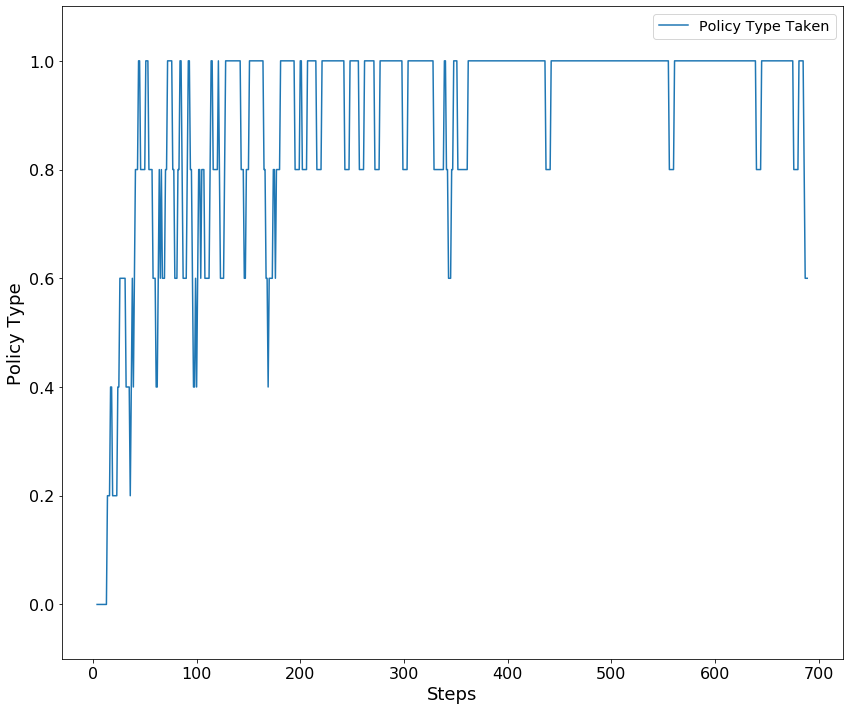

No handles with labels found to put in legend.


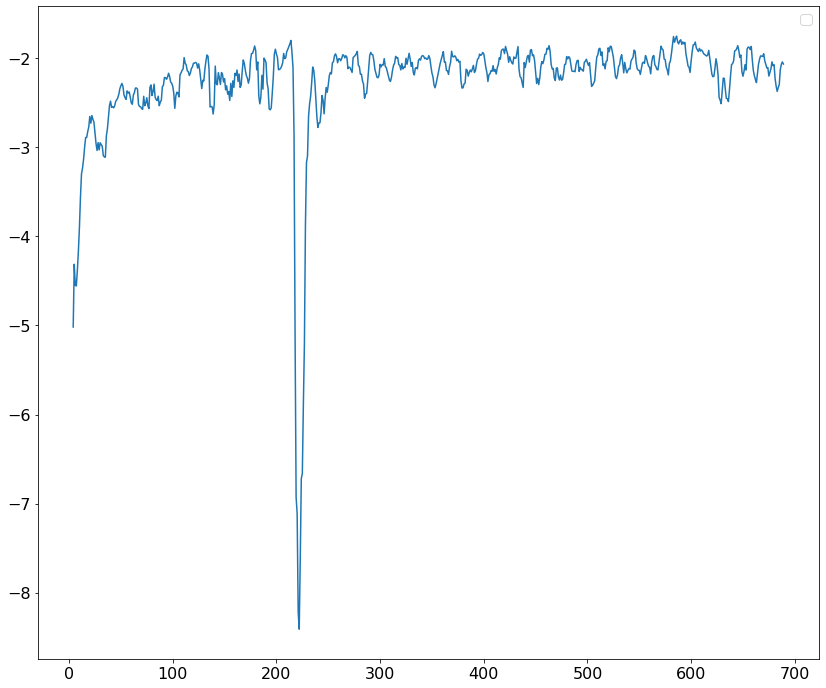

In [13]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## READ data 
import pandas as pd
import numpy as np
import math, sys
dir_name = '../drivers/'
#filename1 = dir_name+'data_accelerator_lstm_episode10000_steps50_batched_memories_0602420_v1.log'
filename1 = dir_name+'/2_data_accelerator_lstm_episode5000_steps45_batched_memories_09022020_v1.log'#2_data_accelerator_lstm_episode5000_steps100_batched_memories_0602420_v1.log'
frame = pd.read_csv(filename1, sep=' ',
                 header=None, names=['current_state', 'action', 'reward','next_state', 'total_reward','done','policy_type','episode'])

print(frame.head())

##
frame = frame[frame.done==True] 
frame = frame.reset_index()

## rolling averages ##
rolling_setting = 5
frame['policy_type_roll'] = frame['policy_type'].rolling(rolling_setting).mean()
frame['total_reward_roll'] = frame['total_reward'].rolling(rolling_setting).mean()


## Plot all action types ##
fig,ax = plt.subplots(1, 1,figsize=(14,12))
plt.plot(frame['policy_type_roll'].interpolate(method='cubic'),label='Policy Type Taken')
ax.set_xlabel('Steps')
ax.set_ylabel('Policy Type')
plt.ylim(-0.1,1.1)
plt.legend(fontsize='x-large')
plt.show()

## Print total reward ##
#frame_done = frame[frame.done==True] 
#frame_done = frame_done.reset_index()
#print(frame_done.total_reward_roll)
#frame_done.total_reward.plot()
fig,ax = plt.subplots(1, 1,figsize=(14,12))
plt.plot(frame['total_reward_roll'])
#ax.set_xlabel('Steps')
#ax.set_ylabel('Policy Type')
#plt.ylim(-0.1,1.1)
plt.legend(fontsize='x-large')
plt.show()
#fig,ax = plt.subplots(1, 1,figsize=(14,12))
#plt.plot(frame.total_reward_roll, label='Total Reward')
ax.set_xlabel('Episodes')
ax.set_ylabel('Total Reward')
#plt.legend(fontsize='x-large')
plt.show()